In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [2]:
# load data
df_train = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")
submission.head()

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


In [3]:
# check for weird types, num entries, shape, etc...
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [4]:
# look at ranges of values, binary features, weird min or max to signify outliers, etc...
df_train.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [5]:
# label encode target for later use
from sklearn.preprocessing import LabelEncoder
print(df_train["Target"].head())
le = LabelEncoder()
df_train["Target"] = le.fit_transform(df_train["Target"])
df_train["Target"]

0    Graduate
1     Dropout
2     Dropout
3    Enrolled
4    Graduate
Name: Target, dtype: object


0        2
1        0
2        0
3        1
4        2
        ..
76513    2
76514    2
76515    1
76516    0
76517    2
Name: Target, Length: 76518, dtype: int64

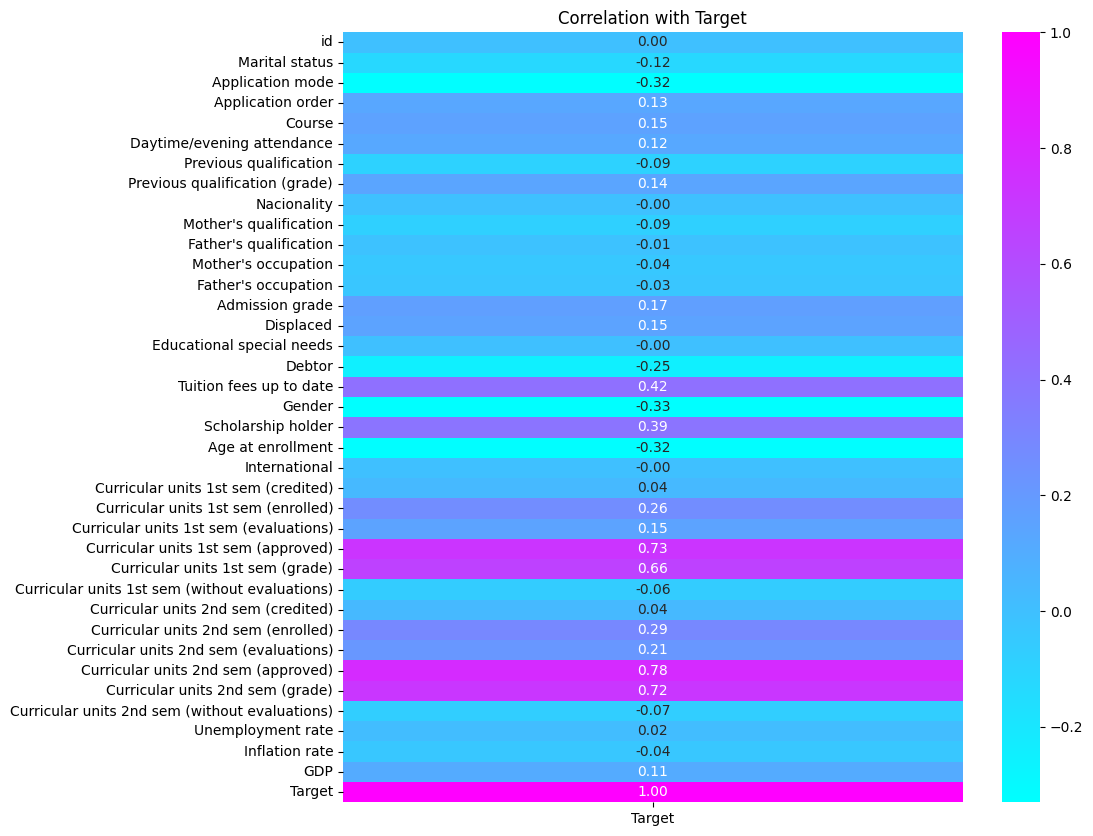

In [6]:
# heatmap of correlation matrix to see relationships to Target (Mutual Info prob better for this tbh)
import matplotlib.pyplot as plt
import seaborn as sns

# corr matrix relating to Target feature
corr_train = df_train.corr()
target_corr = corr_train[["Target"]]

# plot matrix on heatmap
plt.figure(figsize=(10,10))
sns.heatmap(target_corr, annot=True, cmap='cool', fmt='.2f')
plt.title("Correlation with Target")
plt.show()

In [7]:
# get rid of columns with super low positive or negative correlation to Target
temp = target_corr[(target_corr['Target'] < -0.1) | (target_corr['Target'] > 0.1)]
cols = temp.T.columns

# only use filtered columns now on train and test df
new_cols = df_train.columns.intersection(cols)
new_train = df_train[new_cols]
new_cols = new_cols.drop("Target")
new_test = df_test[new_cols]
new_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,1,1,9238,1,126.0,122.6,0,0,1,...,6,6,6,14.500000,6,7,6,12.428571,2.02,2
1,1,17,1,9238,1,125.0,119.8,1,0,1,...,6,8,4,11.600000,6,9,0,0.000000,2.02,0
2,1,17,2,9254,1,137.0,144.7,0,0,1,...,6,0,0,0.000000,6,0,0,0.000000,-0.92,0
3,1,1,3,9500,1,131.0,126.1,1,0,1,...,7,9,7,12.591250,8,11,7,12.820000,2.02,1
4,1,1,2,9500,1,132.0,120.1,1,0,1,...,7,12,6,12.933333,7,12,6,12.933333,0.32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,121.0,116.5,1,0,1,...,6,9,6,10.666667,6,8,5,10.600000,0.79,2
76514,1,1,6,9254,1,125.0,131.6,1,0,1,...,6,22,4,13.000000,6,9,6,13.875000,-3.12,2
76515,5,17,1,9085,1,138.0,123.3,1,0,1,...,5,13,4,12.500000,5,8,5,11.400000,-3.12,1
76516,1,1,3,9070,1,136.0,124.8,1,0,1,...,6,0,0,0.000000,6,0,0,0.000000,0.32,0


In [8]:
# encode again :P
le = LabelEncoder()
new_train["Target"] = le.fit_transform(new_train["Target"])
new_train["Target"]

<ipython-input-8-d1618a3d1aaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train["Target"] = le.fit_transform(new_train["Target"])


0        2
1        0
2        0
3        1
4        2
        ..
76513    2
76514    2
76515    1
76516    0
76517    2
Name: Target, Length: 76518, dtype: int64

In [9]:
# build model, could do better with more intensive tuning I assume
# XGB because I like it for classification
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

y = new_train["Target"]
X = new_train.drop("Target", axis = "columns")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# parameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 0.98],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'n_estimators': [100, 120, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

# init model
xgb = XGBClassifier(random_state=42)

# set up grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# fit grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 120, 150],
                         'subsample': [0.8, 0.9, 0.98]},
             scoring='accuracy', verbose=2)

In [10]:
# predictions on train/validation
from sklearn.metrics import accuracy_score, classification_report

# use best model for predictions
best_xgb = grid_search.best_estimator_
y_preds = best_xgb.predict(X_val)

# metrics
print("Accuracy: ", accuracy_score(y_val, y_preds))
print("Classification Report: ", classification_report(y_val, y_preds))

Accuracy:  0.8310245687401986
Classification Report:                precision    recall  f1-score   support

           0       0.90      0.83      0.87      5028
           1       0.65      0.61      0.63      3017
           2       0.86      0.92      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304



In [11]:
# predict on test
test_predictions = best_xgb.predict(new_test)

# reverse the label encoding
test_predictions_original = le.inverse_transform(test_predictions)

# create submission
ids = df_test['id']
output_df = pd.DataFrame({'id': ids, 'Predicted Target': test_predictions_original})
output_df['Predicted Target'] = output_df['Predicted Target'].replace(0,'Dropout')
output_df['Predicted Target'] = output_df['Predicted Target'].replace(1,'Enrolled')
output_df['Predicted Target'] = output_df['Predicted Target'].replace(2,'Graduate')
output_df.to_csv("predictions.csv", index=False)

print("Predictions saved to 'predictions.csv'.")
output_df.head()

Predictions saved to 'predictions.csv'.


,id,Predicted Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled
